# Baseline models for the Palmer Penguins dataset.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder

In [2]:
# setting up plot style

import matplotlib.font_manager as fm

path_to_public_sans = fm.findfont('Public Sans')
public_sans = fm.FontProperties(fname=path_to_public_sans)

sns.set_style("whitegrid")
plt.rcParams['font.family'] = public_sans.get_name()  # Register the font by its internal name
plt.rcParams['font.size'] = 12

# set figure size to 14, 6 in rcparams
plt.rcParams['figure.figsize'] = 14, 6
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.facecolor'] = '#f7f6f2'
plt.rcParams['axes.facecolor'] = '#f7f6f2'
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.alpha'] = 0.55
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#095859"])

# xtick text size
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [120]:
penguin_data = pd.read_csv("../datasets/palmer-penguins/penguins_medium_imbalance.csv")

## EDA

Exploring class imbalance:

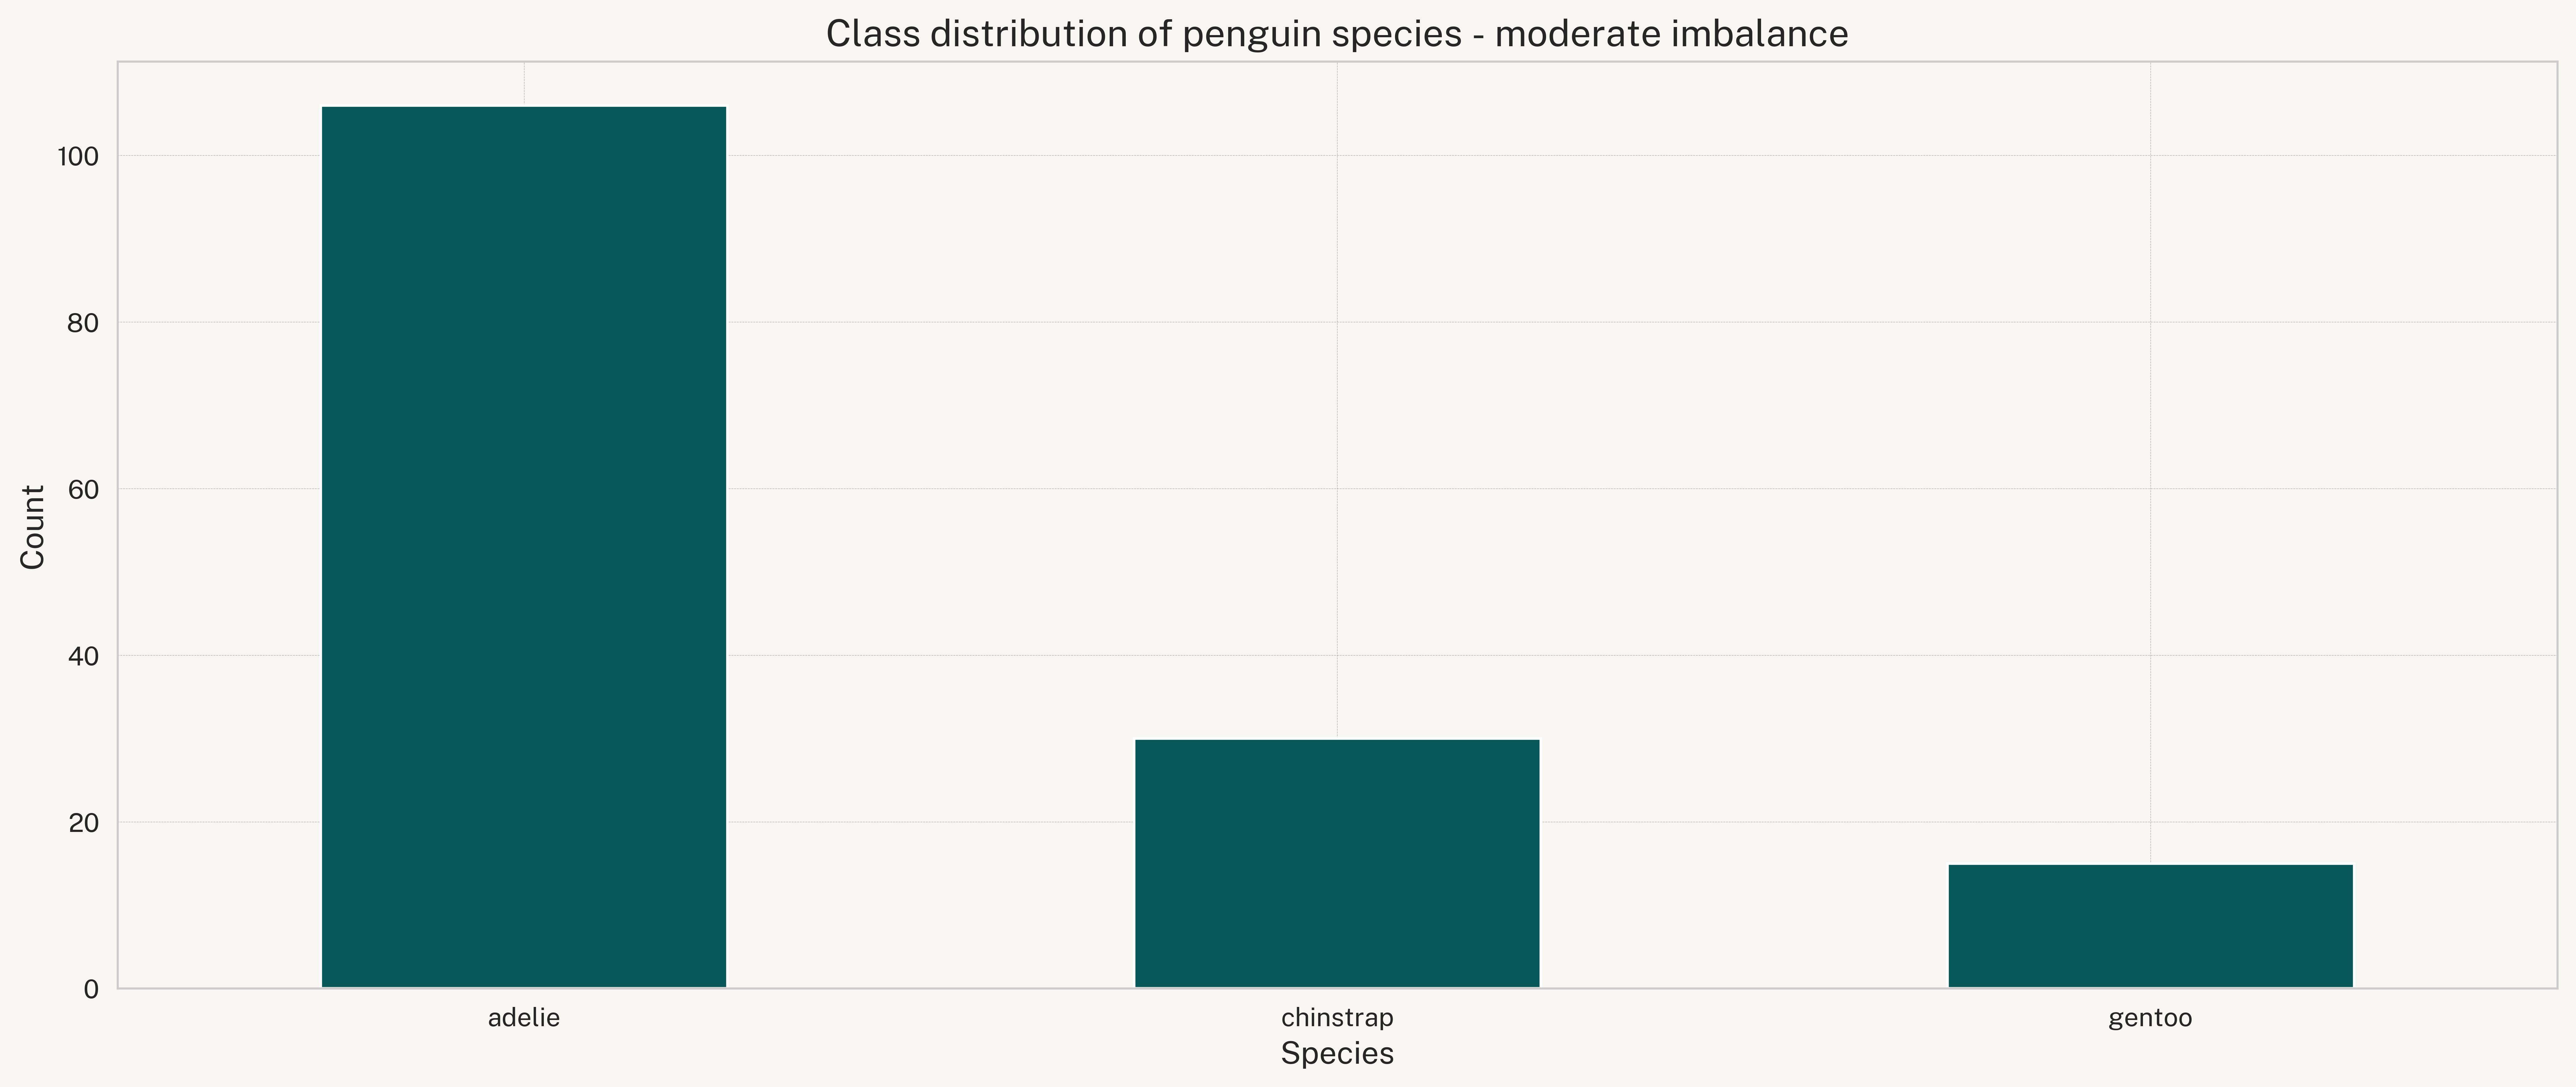

In [121]:
penguin_data['species'].value_counts().plot(kind='bar')
plt.title("Class distribution of penguin species - moderate imbalance")
plt.xlabel("Species")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [122]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            151 non-null    object 
 1   island             151 non-null    object 
 2   culmen_length_mm   150 non-null    float64
 3   culmen_depth_mm    150 non-null    float64
 4   flipper_length_mm  150 non-null    float64
 5   body_mass_g        150 non-null    float64
 6   sex                145 non-null    object 
dtypes: float64(4), object(3)
memory usage: 8.4+ KB


We can now take a look at the continuous features as well.

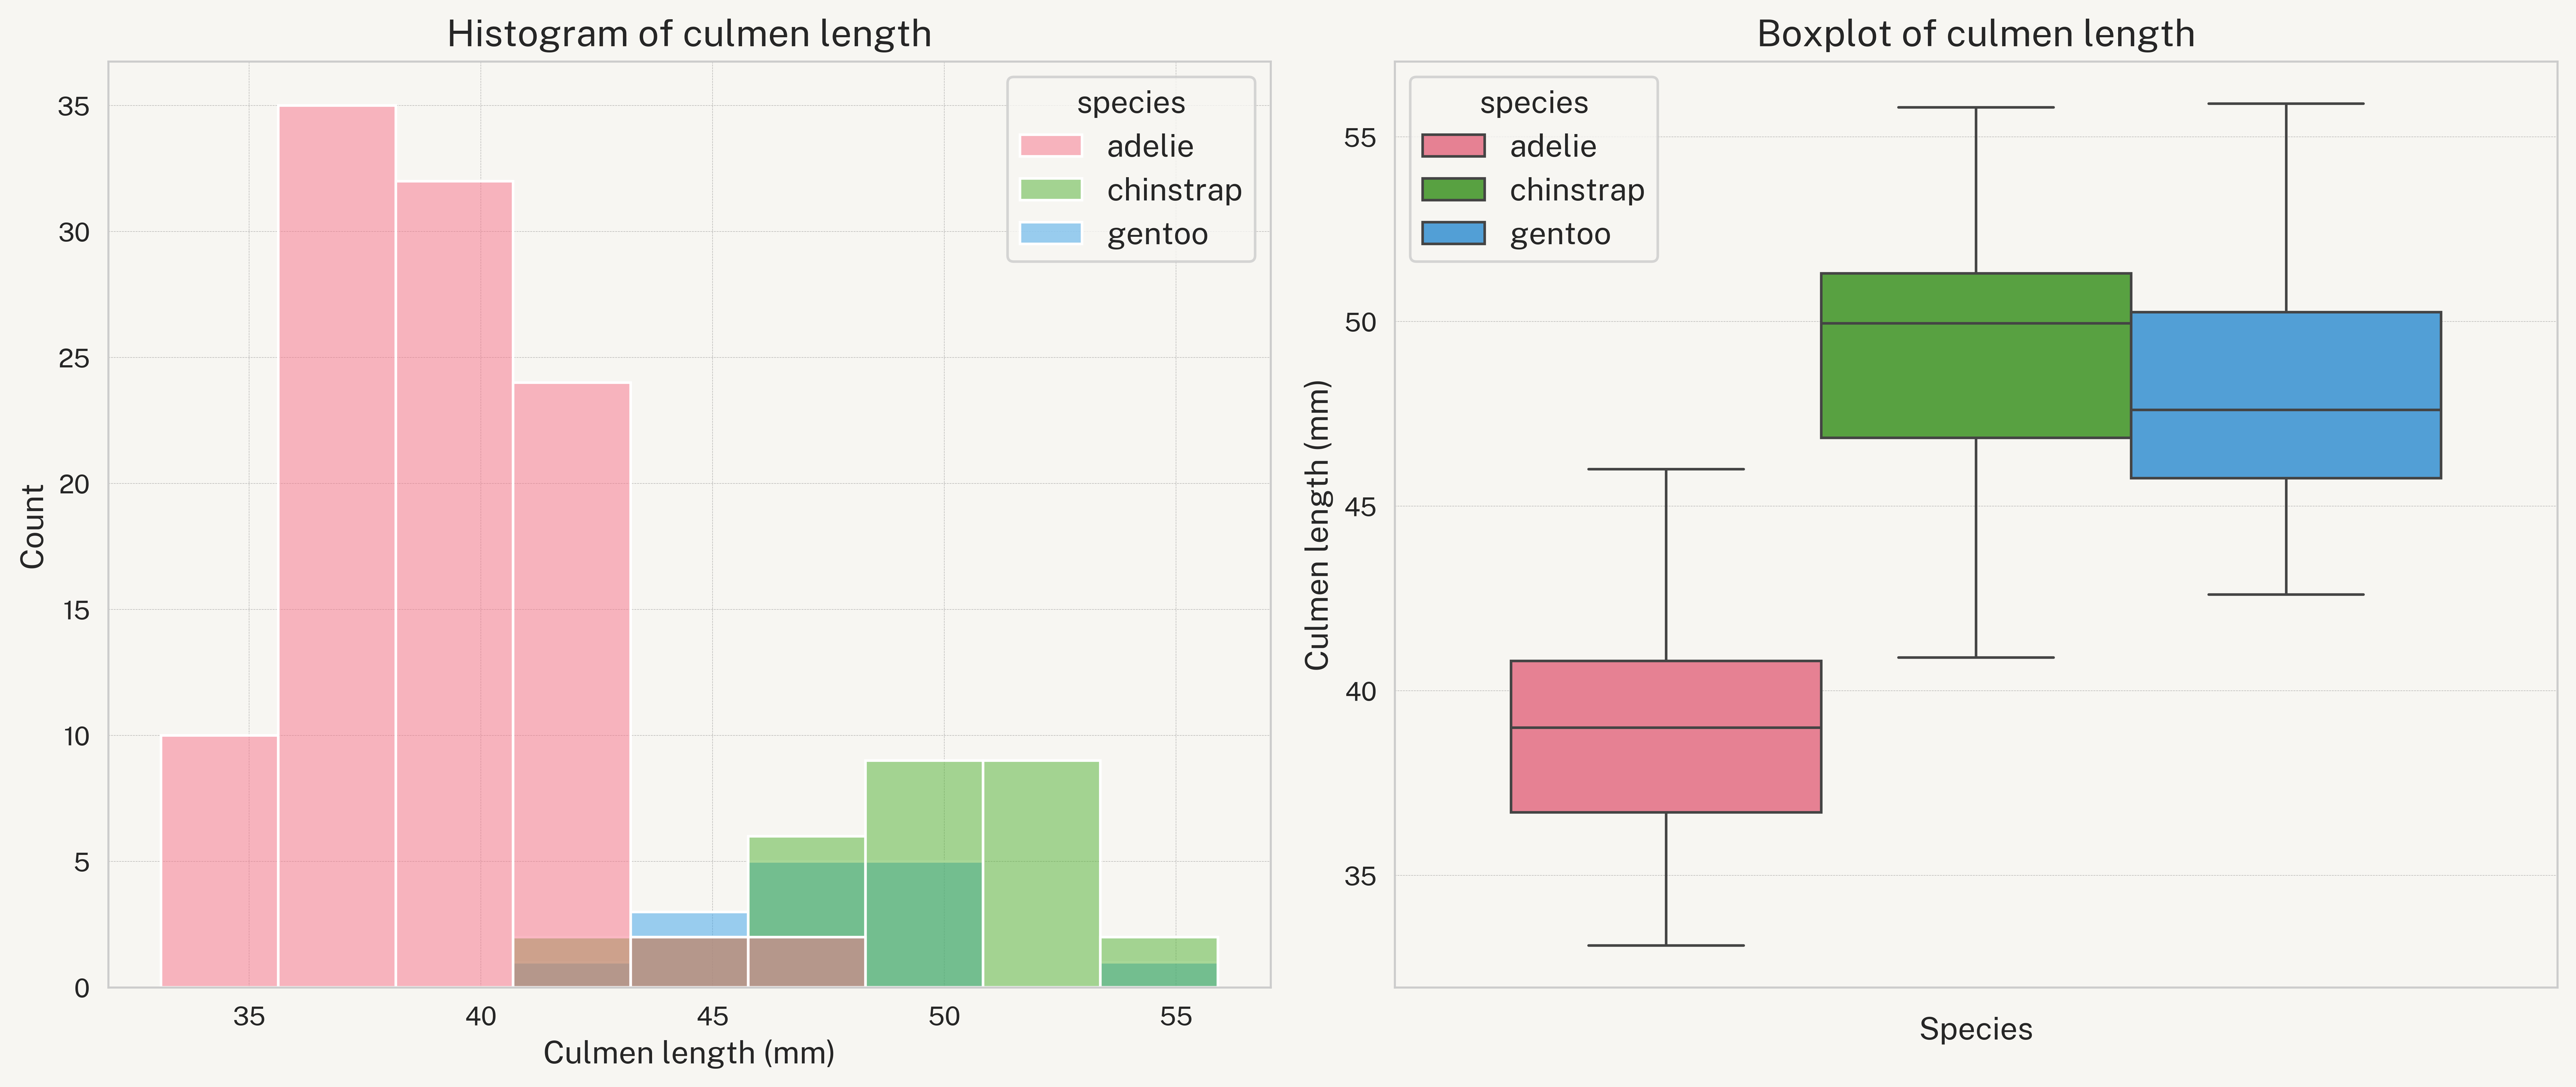

In [123]:
# histogram and boxplot of culmen length by species
fig, ax = plt.subplots(1, 2)
sns.histplot(data=penguin_data, x="culmen_length_mm", ax=ax[0], hue="species")
ax[0].set_xlabel("Culmen length (mm)")
ax[0].set_title("Histogram of culmen length")

sns.boxplot(y='culmen_length_mm', data=penguin_data, ax=ax[1], hue="species")
ax[1].set_ylabel("Culmen length (mm)")
ax[1].set_xlabel("Species")
ax[1].set_title("Boxplot of culmen length")

plt.tight_layout()
plt.show()

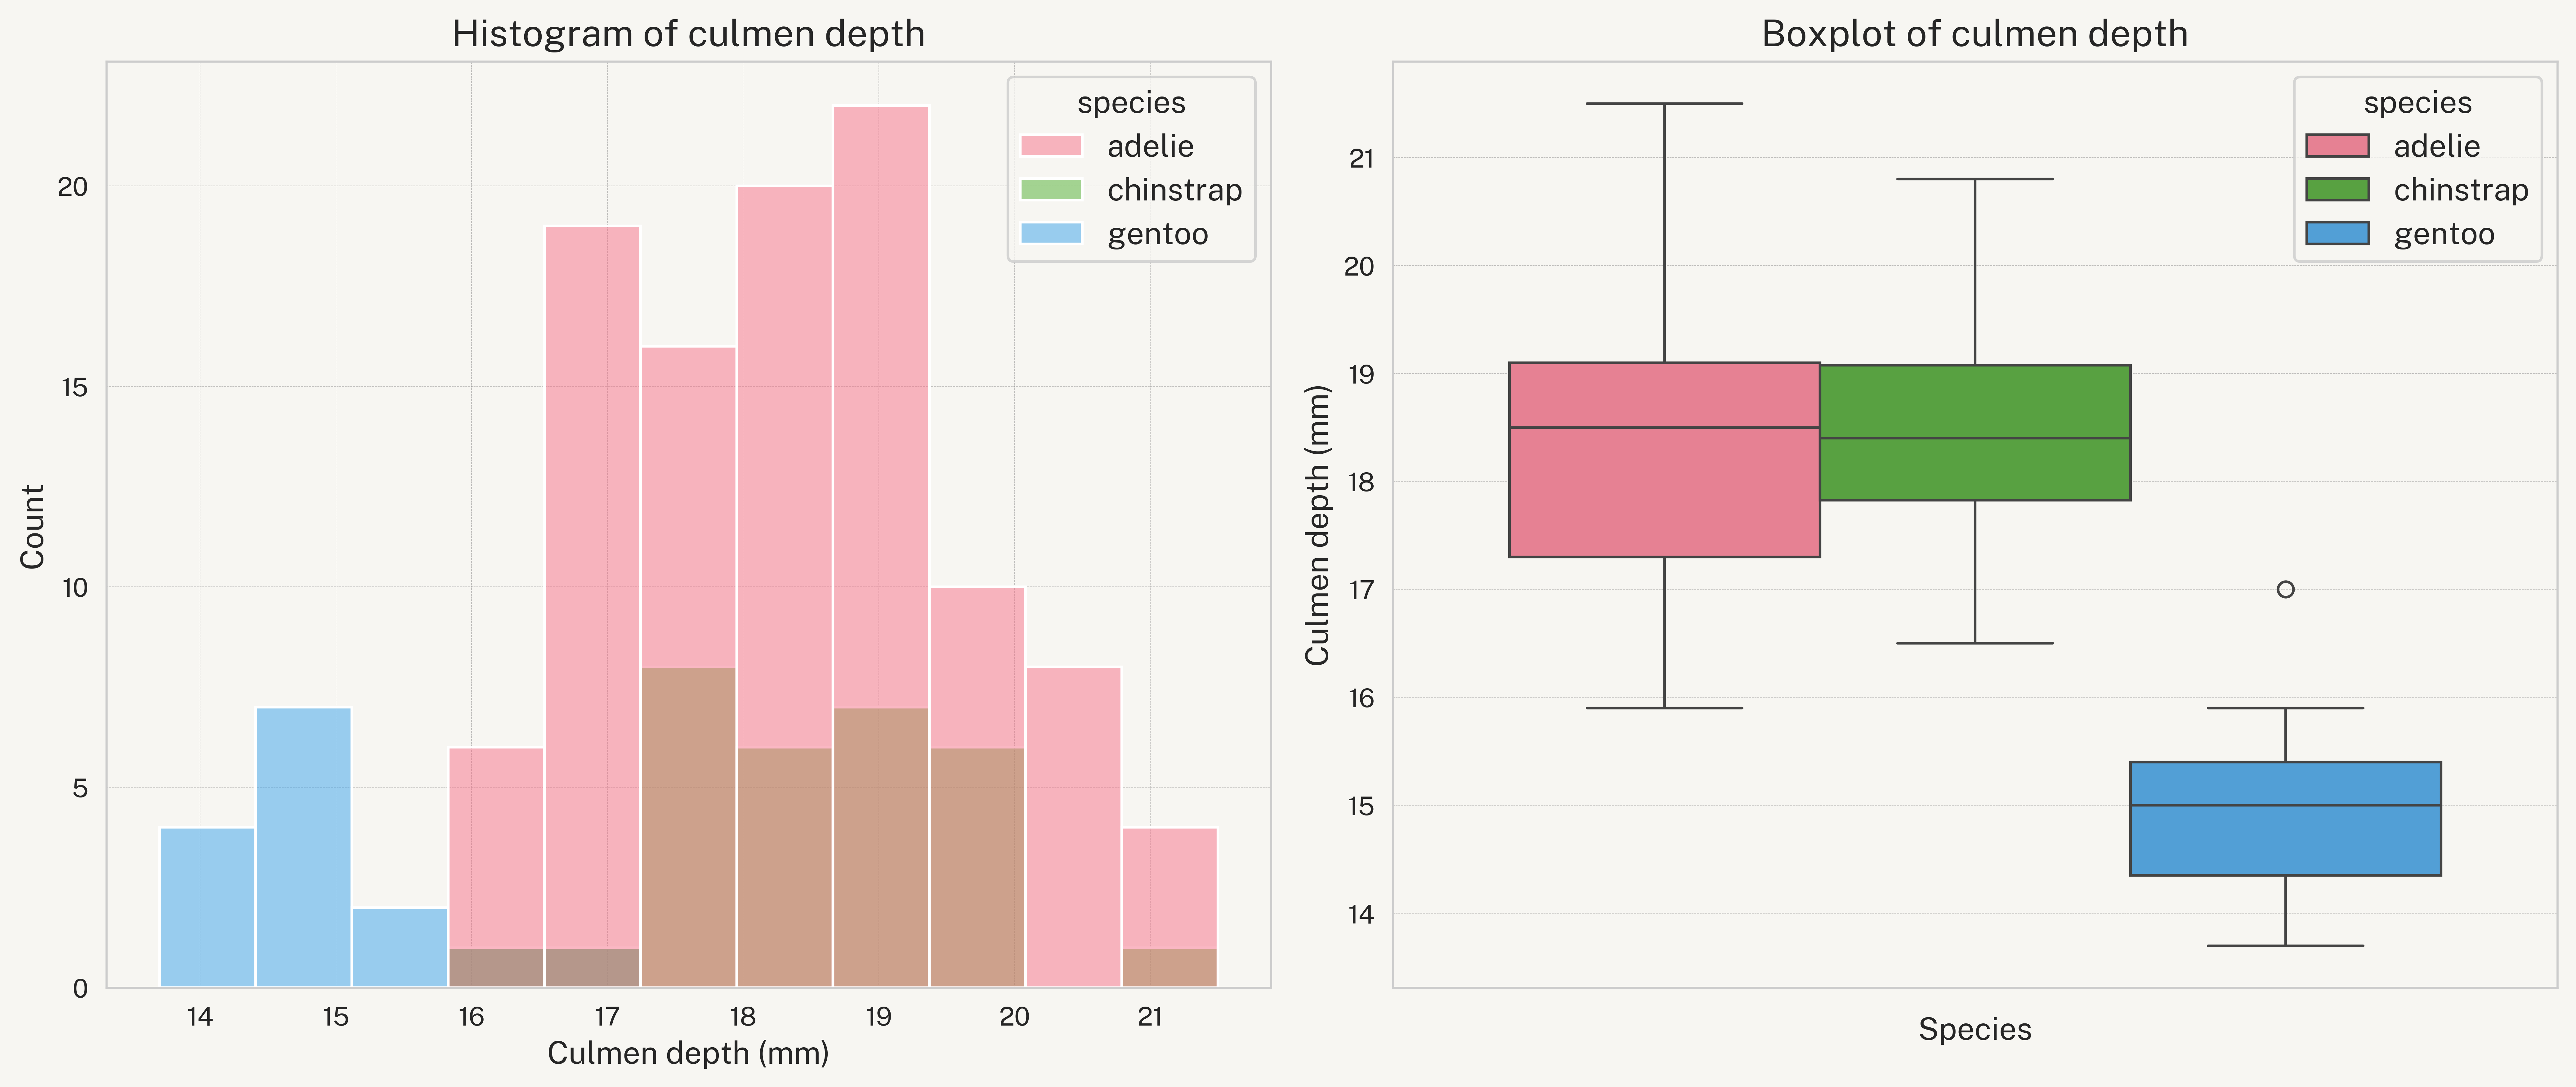

In [124]:
# histogram and boxplot of culmen depth by species
fig, ax = plt.subplots(1, 2)
sns.histplot(data=penguin_data, x="culmen_depth_mm", ax=ax[0], hue="species")
ax[0].set_xlabel("Culmen depth (mm)")
ax[0].set_title("Histogram of culmen depth")

sns.boxplot(y='culmen_depth_mm', data=penguin_data, ax=ax[1], hue="species")
ax[1].set_ylabel("Culmen depth (mm)")
ax[1].set_xlabel("Species")
ax[1].set_title("Boxplot of culmen depth")

plt.tight_layout()
plt.show()

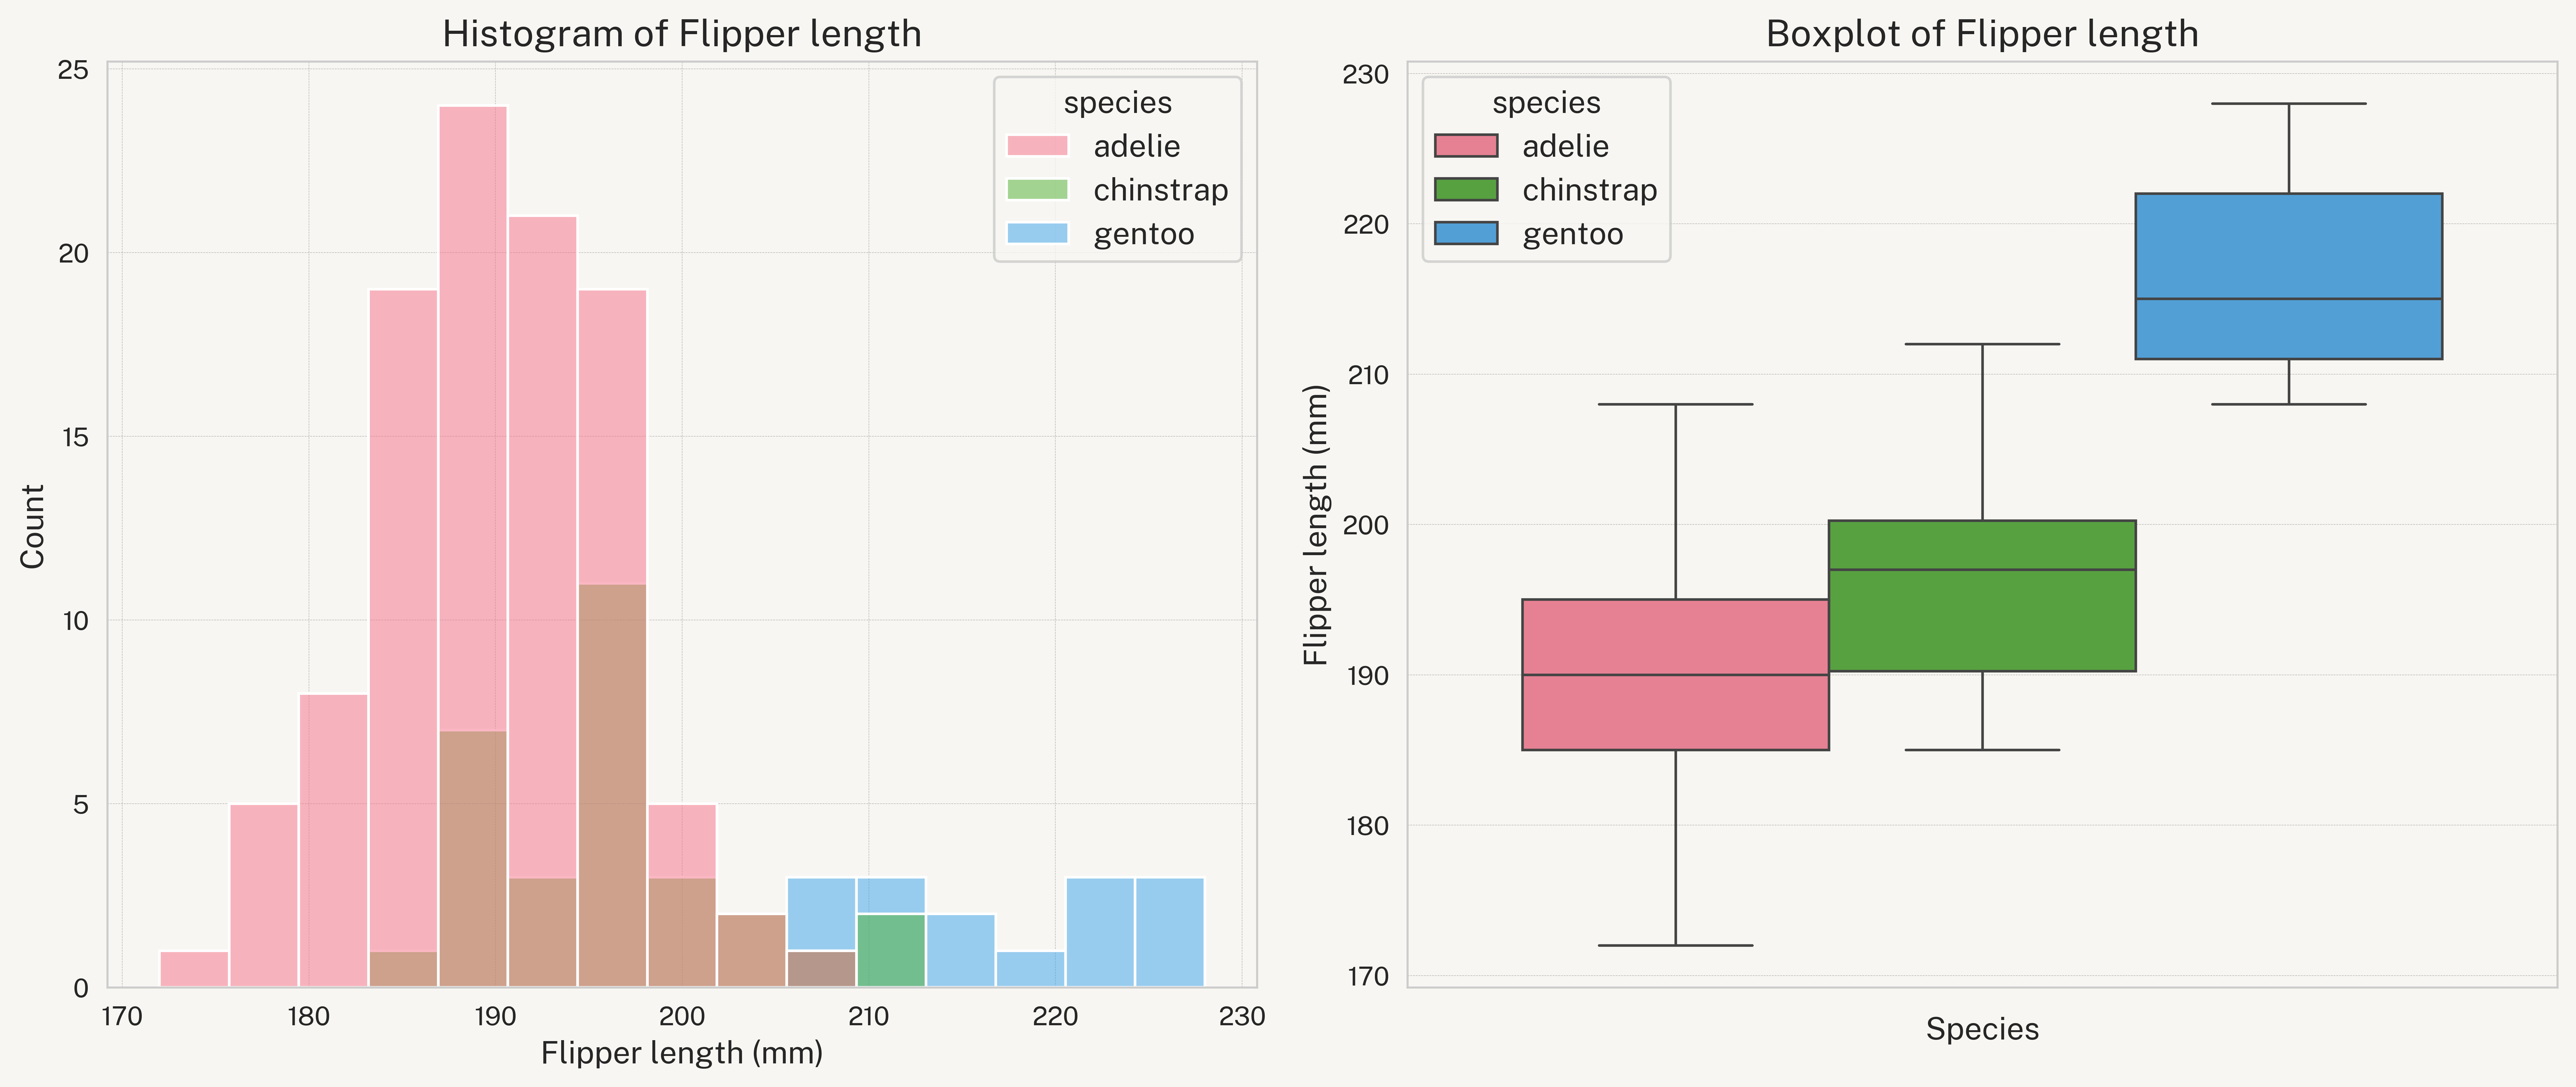

In [125]:
# histogram and boxplot of culmen length by species
fig, ax = plt.subplots(1, 2)
sns.histplot(data=penguin_data, x="flipper_length_mm", ax=ax[0], hue="species")
ax[0].set_xlabel("Flipper length (mm)")
ax[0].set_title("Histogram of Flipper length")

sns.boxplot(y='flipper_length_mm', data=penguin_data, ax=ax[1], hue="species")
ax[1].set_ylabel("Flipper length (mm)")
ax[1].set_xlabel("Species")
ax[1].set_title("Boxplot of Flipper length")

plt.tight_layout()
plt.show()

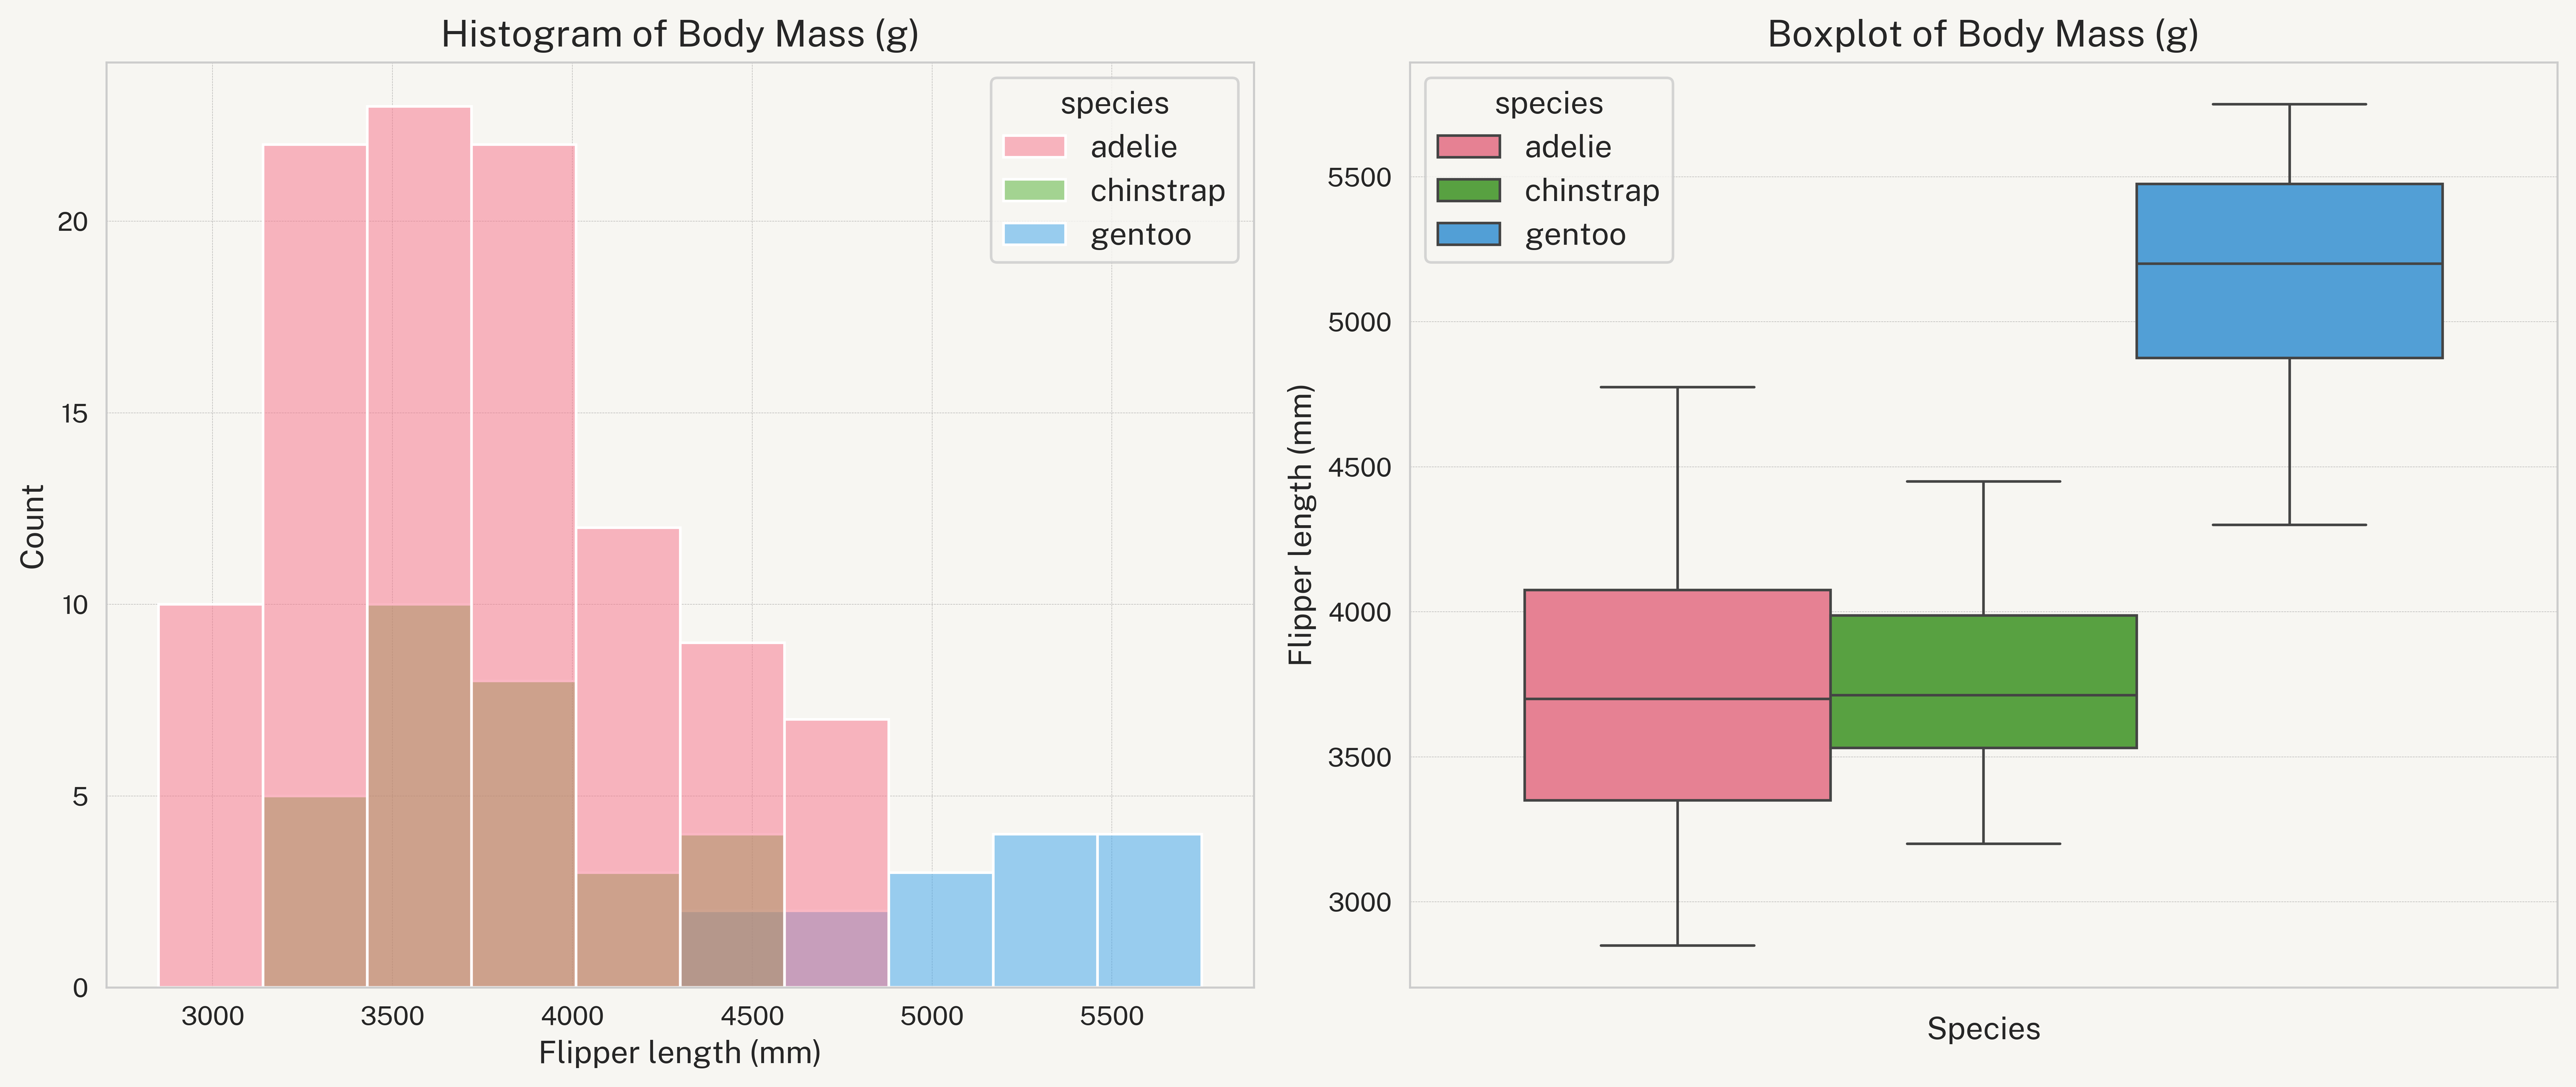

In [126]:
# histogram and boxplot of culmen length by species
fig, ax = plt.subplots(1, 2)
sns.histplot(data=penguin_data, x="body_mass_g", ax=ax[0], hue="species")
ax[0].set_xlabel("Flipper length (mm)")
ax[0].set_title("Histogram of Body Mass (g)")

sns.boxplot(y='body_mass_g', data=penguin_data, ax=ax[1], hue="species")
ax[1].set_ylabel("Flipper length (mm)")
ax[1].set_xlabel("Species")
ax[1].set_title("Boxplot of Body Mass (g)")

plt.tight_layout()
plt.show()

# Baseline Logistic Regression and Random Forest models 

In [127]:
# missing values
penguin_data.isnull().sum()

species              0
island               0
culmen_length_mm     1
culmen_depth_mm      1
flipper_length_mm    1
body_mass_g          1
sex                  6
dtype: int64

## Impute data for numerical columns using a KNNImputer

In [133]:
# select all columns with data type int64

numeric_cols = penguin_data.select_dtypes(exclude='object').columns.tolist()

In [134]:
knn_imputer = KNNImputer(n_neighbors=5)
penguin_data[numeric_cols] = knn_imputer.fit_transform(penguin_data[numeric_cols])

In [135]:
penguin_data['sex'].fillna(penguin_data['sex'].mode()[0], inplace=True)

In [136]:
X = penguin_data.drop(columns=['species'])
y = penguin_data['species']

In [137]:
# fill missing values with mean for numerical columns
X['culmen_length_mm'] = X['culmen_length_mm'].fillna(X['culmen_length_mm'].mean())
X['culmen_depth_mm'] = X['culmen_depth_mm'].fillna(X['culmen_depth_mm'].mean())
X['flipper_length_mm'] = X['flipper_length_mm'].fillna(X['flipper_length_mm'].mean())
X['body_mass_g'] = X['body_mass_g'].fillna(X['body_mass_g'].mean())

In [138]:
Y = LabelEncoder().fit_transform(y)

In [139]:
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [140]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_dream,island_torgersen,sex_male
0,35.9,16.6,190.0,3050.0,0,1,0
1,36.6,18.4,184.0,3475.0,1,0,0
2,38.1,18.6,190.0,3700.0,1,0,0
3,36.7,18.8,187.0,3800.0,0,1,0
4,41.1,17.5,190.0,3900.0,1,0,1
...,...,...,...,...,...,...,...
146,47.8,15.0,215.0,5650.0,0,0,1
147,55.9,17.0,228.0,5600.0,0,0,1
148,50.5,15.9,222.0,5550.0,0,0,1
149,50.8,15.7,226.0,5200.0,0,0,1


Scale numerical features

In [141]:
standard_scaler = StandardScaler()
X[numeric_cols] = standard_scaler.fit_transform(X[numeric_cols])

In [142]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_dream,island_torgersen,sex_male
0,-1.120809,-0.927799,-0.357082,-1.354983,0,1,0
1,-0.989975,0.215541,-0.937180,-0.657102,1,0,0
2,-0.709617,0.342579,-0.357082,-0.287636,1,0,0
3,-0.971284,0.469616,-0.647131,-0.123429,0,1,0
4,-0.148901,-0.356129,-0.357082,0.040778,1,0,1
...,...,...,...,...,...,...,...
146,1.103364,-1.944102,2.059991,2.914403,0,0,1
147,2.617297,-0.673724,3.316870,2.832300,0,0,1
148,1.608008,-1.372432,2.736772,2.750196,0,0,1
149,1.664080,-1.499469,3.123504,2.175471,0,0,1


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1205)

logistic_regression = LogisticRegression(max_iter=1000, C=0.1, solver='saga')
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.967741935483871


In [151]:
# Random forest model

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=1205, max_depth=5)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_rf))

Accuracy:  1.0


In [149]:
from sklearn.model_selection import cross_val_score

cross_val_score(logistic_regression, X, Y, cv=5, scoring='accuracy').mean()

0.9800000000000001

In [150]:
cross_val_score(random_forest, X, Y, cv=5, scoring='accuracy').mean()

0.9866666666666667